# Activation and Loss Function Exploration Exercise

## Background
This exercise aims to explore the effects of different activation and loss functions on a neural network's learning and performance. You will modify a simple neural network in TensorFlow to experiment with these functions.

## Activation Functions
Common activation functions include:

* Sigmoid
* ReLU (Rectified Linear Unit)
* Tanh (Hyperbolic Tangent)

## Loss Functions
Some standard loss functions are:

* Mean Squared Error (MSE) - typically used for regression tasks
* Binary Cross-Entropy - used for binary classification
* Categorical Cross-Entropy - used for multi-class classification

# Setup
First, let's import TensorFlow and other necessary libraries. Run the cell below to import them.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
# Set the random seed for NumPy and TensorFlow
np.random.seed(42)
tf.random.set_seed(42)


## Dataset Preparation
We'll use a synthetic dataset for binary classification. The 'make_moons' function from scikit-learn generates a two-moon dataset, which is ideal for this experiment.

c:\Users\Agam\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Agam\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


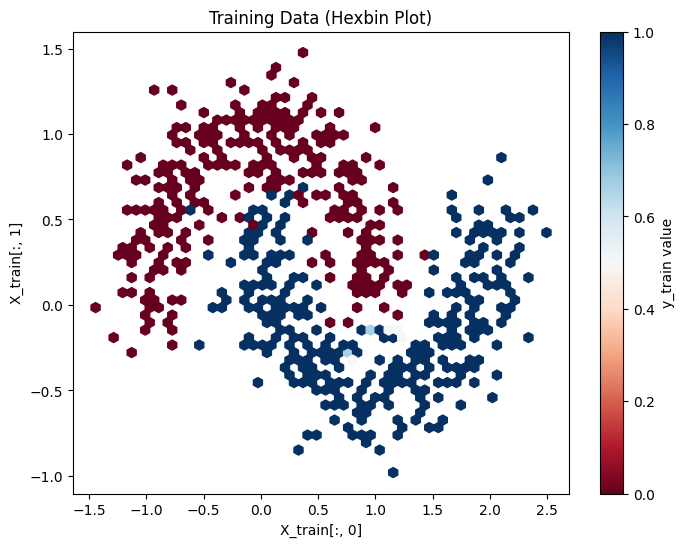

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize the dataset using hexbin
plt.figure(figsize=(8, 6))
plt.hexbin(X_train[:, 0], X_train[:, 1], C=y_train, gridsize=50, cmap=plt.cm.RdBu)
plt.colorbar(label='y_train value')
plt.title("Training Data (Hexbin Plot)")
plt.xlabel("X_train[:, 0]")
plt.ylabel("X_train[:, 1]")
plt.show()


## Model Building
Now, let's define a function to create a simple neural network model. You will modify this function later to experiment with different activation and loss functions.

In [4]:
def build_model(activation_function='relu', loss_function='binary_crossentropy'):
    tf.keras.utils.set_random_seed(42)
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, activation=activation_function, input_shape=(2,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
    return model



# Training and evaluating the model
Let's train the model and see how well it solves the problem.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming X_train, X_test, y_train, y_test are already defined
# Also assuming 'model' is a pre-defined TensorFlow/Keras model

def train_and_evaluate_model(model, epochs: int =100):
    tf.keras.utils.set_random_seed(42)
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0, validation_split=0.2, shuffle=False)
    
    # Evaluating the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    # Plotting training history and predictions on one figure
    plt.figure(figsize=(18, 5))
    plt.suptitle(f"Training and Validation and Activation Function:{model.layers[0].activation.__name__.capitalize()}\nOutput layer activation is {model.layers[-1].activation.__name__.capitalize()} \nLoss Function: {model.loss.capitalize()}", fontsize=16, verticalalignment='top', y=1.08)

    # Plotting training and validation accuracy
    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Accuracy (training data)')
    plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
    plt.title('Training and Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Generate points for plotting the function
    x_points = np.linspace(np.min(X_test[:, 0]), np.max(X_test[:, 0]), 100)
    y_points = np.linspace(np.min(X_test[:, 1]), np.max(X_test[:, 1]), 100)
    x_mesh, y_mesh = np.meshgrid(x_points, y_points)
    xy_points = np.column_stack((x_mesh.ravel(), y_mesh.ravel()))

    # Predict using the model
    predicted_values = model.predict(xy_points)

    # Predicting on test data
    predictions = model.predict(X_test) > 0.5

    # Plotting model predictions with the decision boundary
    plt.subplot(1, 3, 2)
    plt.contourf(x_mesh, y_mesh, predicted_values.reshape(x_mesh.shape), levels=[0, 0.5, 1], cmap=plt.cm.RdBu, alpha=0.5)
    plt.hexbin(X_test[:, 0], X_test[:, 1], C=predictions[:, 0], gridsize=50, cmap=plt.cm.RdBu, alpha=0.8)
    plt.title('Model Predictions on Test Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Plotting ground truth
    plt.subplot(1, 3, 3)
    plt.contourf(x_mesh, y_mesh, predicted_values.reshape(x_mesh.shape), levels=[0, 0.5, 1], cmap=plt.cm.RdBu, alpha=0.5)
    plt.hexbin(X_test[:, 0], X_test[:, 1], C=y_test, gridsize=50, cmap=plt.cm.RdBu, alpha=0.8)
    plt.title('Ground Truth for Test Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    plt.tight_layout()
    plt.show()

    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(history.history.keys()) # dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Experimentation


## Task 1: Activation Functions
1. Experiment with different activation functions in the hidden layer. Replace activation_function in build_model with 'sigmoid', 'relu', and 'tanh'.
2. Train the model for each activation function and evaluate its performance on the test set.
3. Record your observations.





94/94 [==============================] - 0s 713us/step


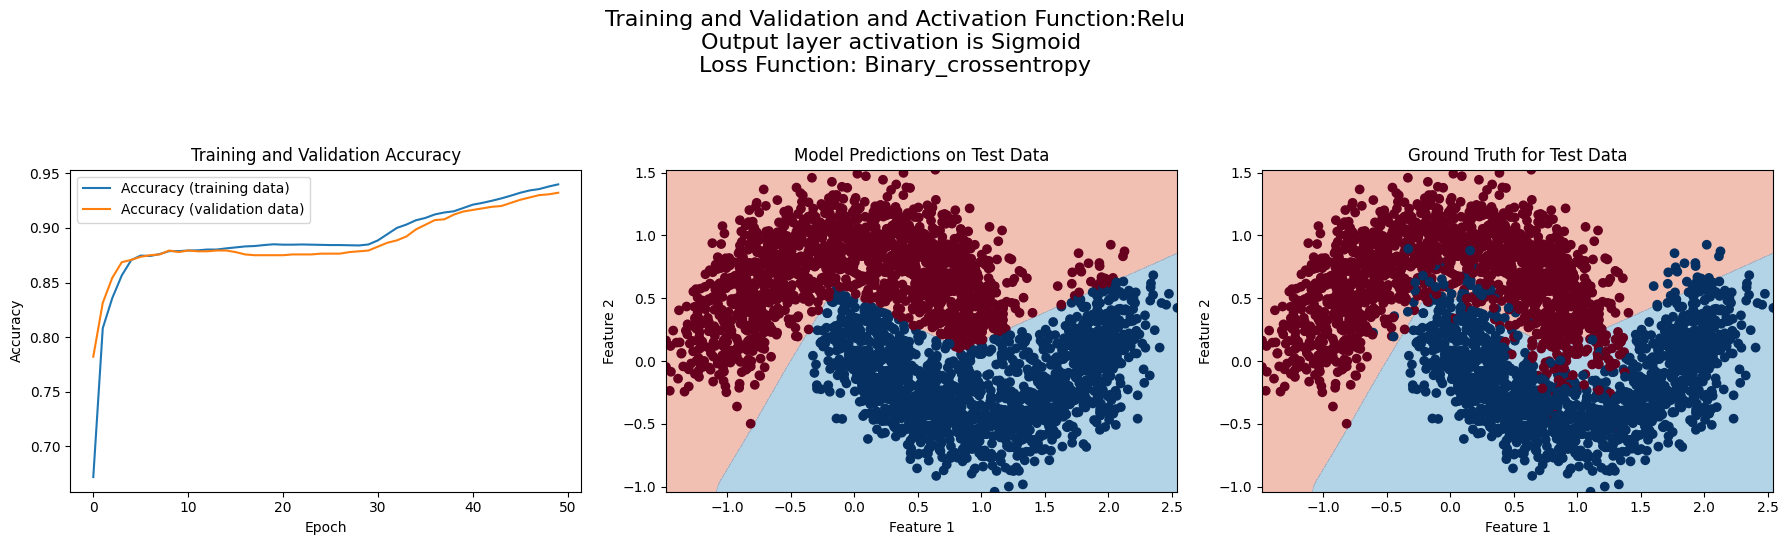

Test Loss: 0.1530
Test Accuracy: 0.9443
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [6]:
activation_function = 'relu'
loss_function = 'binary_crossentropy'
model = build_model(activation_function=activation_function, loss_function=loss_function)
train_and_evaluate_model(model, epochs= 50)



94/94 [==============================] - 0s 628us/step


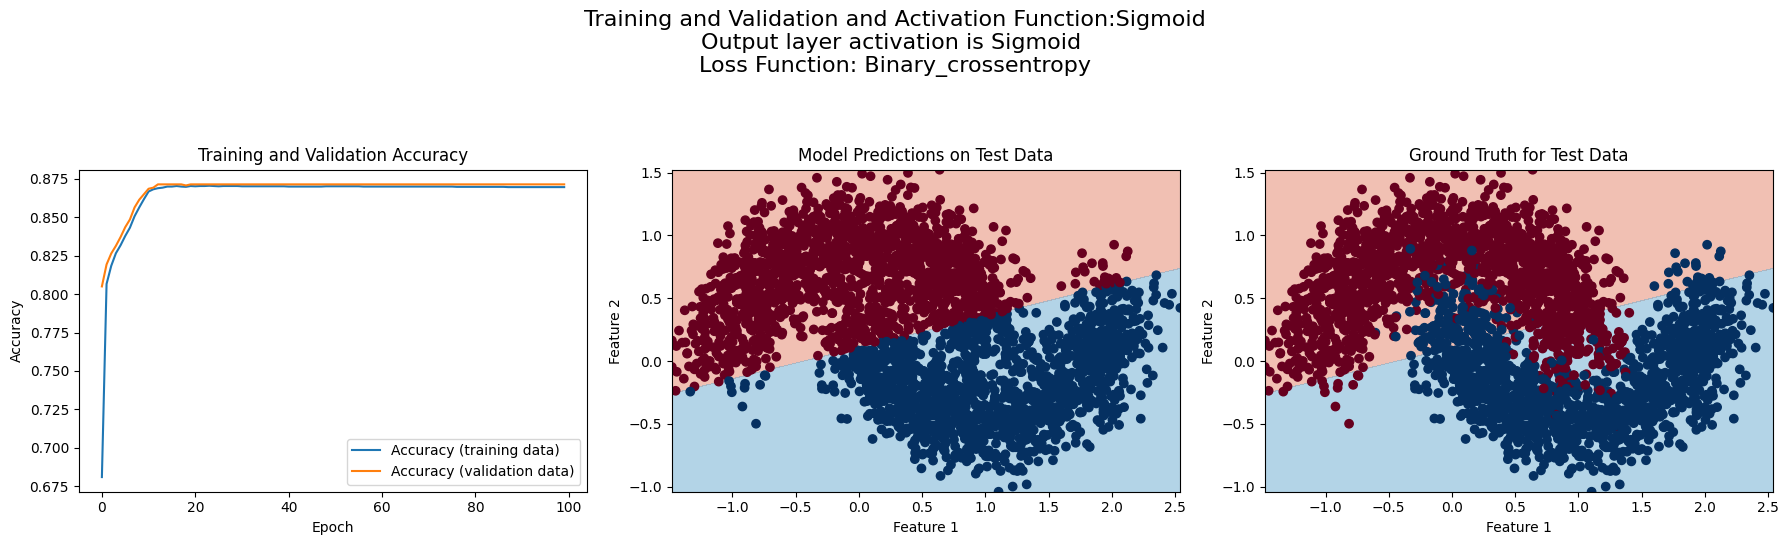

Test Loss: 0.2771
Test Accuracy: 0.8787
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [7]:
activation_function = 'sigmoid'
loss_function = 'binary_crossentropy'
model = build_model(activation_function=activation_function, loss_function=loss_function)
train_and_evaluate_model(model, epochs=100)

94/94 [==============================] - 0s 753us/step


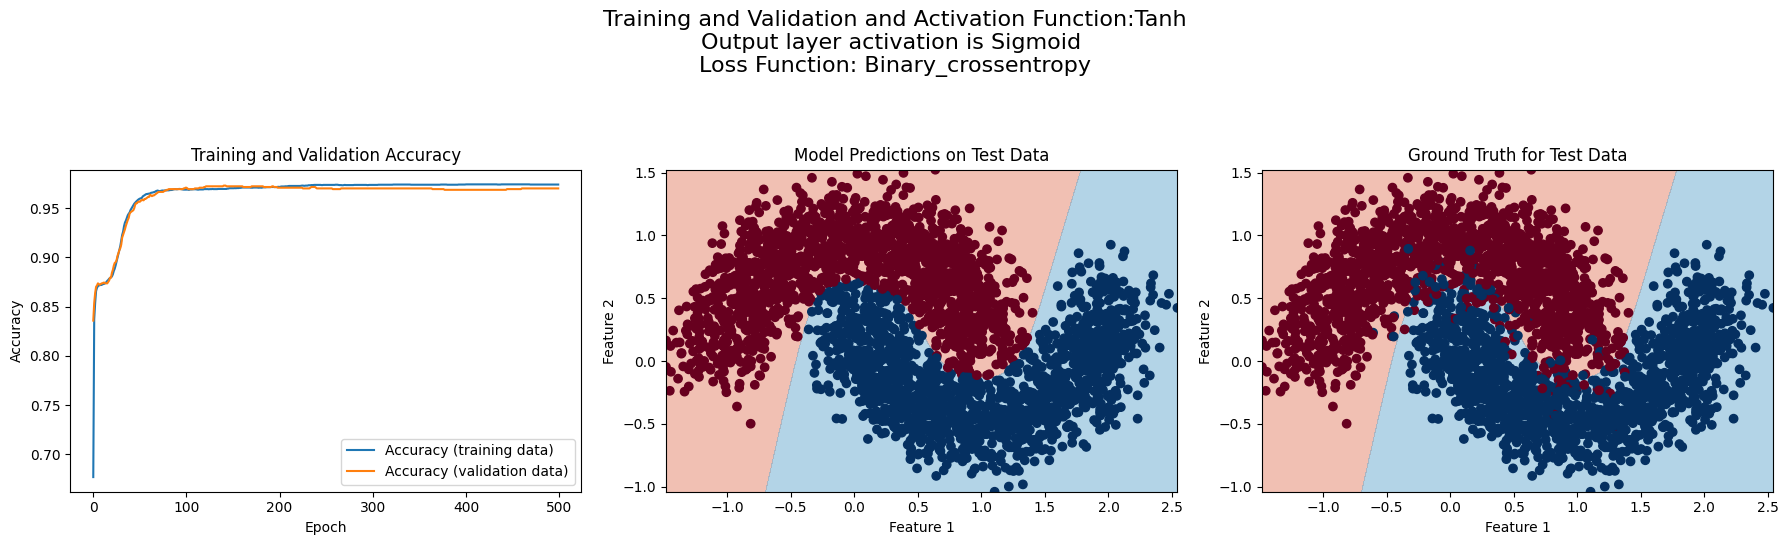

Test Loss: 0.0783
Test Accuracy: 0.9703
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [8]:
activation_function = 'tanh'
loss_function = 'binary_crossentropy'
model = build_model(activation_function=activation_function, loss_function=loss_function)
train_and_evaluate_model(model, epochs=500)

## Task 2: Loss Functions
1. Now, experiment with different loss functions. For binary classification, try 'binary_crossentropy' and 'mean_squared_error'.
2. Train and evaluate the model for each loss function.
3. Record your observations.


94/94 [==============================] - 0s 639us/step


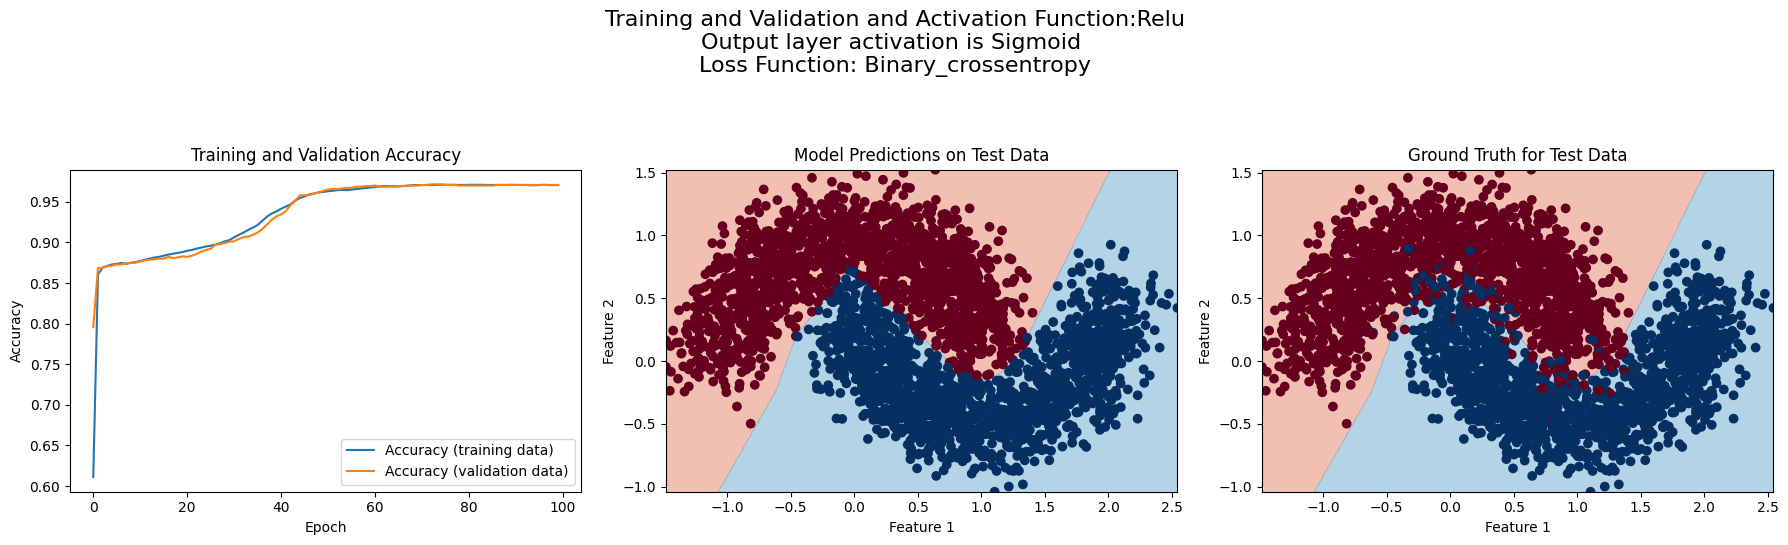

Test Loss: 0.0818
Test Accuracy: 0.9680
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [9]:
activation_function = 'relu'
loss_function = 'binary_crossentropy'
model = build_model(activation_function=activation_function, loss_function=loss_function)
train_and_evaluate_model(model)

94/94 [==============================] - 0s 668us/step


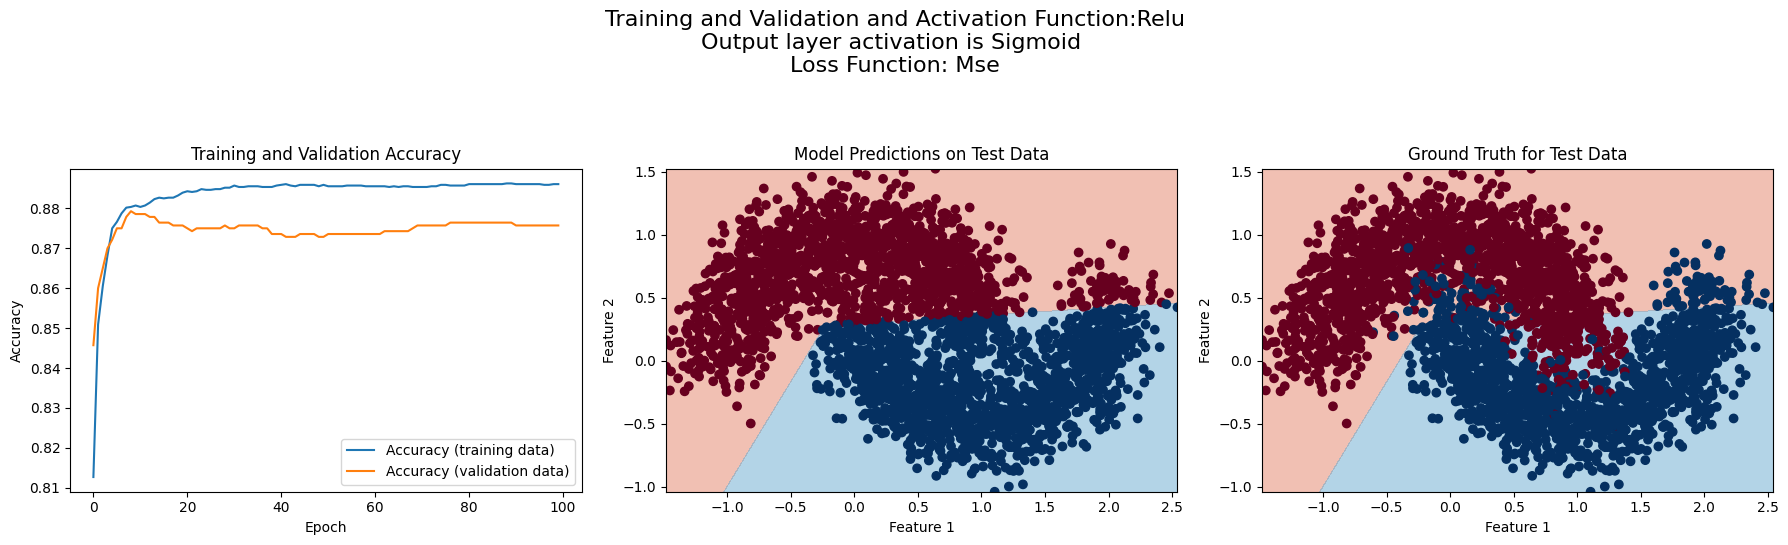

Test Loss: 0.0786
Test Accuracy: 0.8863
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [10]:
activation_function = 'relu'
loss_function = 'mse'
model = build_model(activation_function=activation_function, loss_function=loss_function)
train_and_evaluate_model(model)

In [11]:
model.summary()
#Want to minimise loss. Maximise Accuracy

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                30        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



# Analysis and Questions
After completing the tasks, answer the following questions:


## 1. How did different activation functions affect the model's performance?


#### Relu
- Missed outliers
#### Sigmoid
- It's just Linear, So missing outliers
#### Tanh
- Seems to be the best suited when going for 400+ epochs. 

## 2. How did different loss functions impact the learning process and accuracy?


#### Binary Crossentropy:
- Missed outliers
#### MSE
- Very minimal amount of loss.

3. Which combination of activation and loss function provided the best results for this task?

### Activation function tanh and loss function MSE seems to produce the best results.

94/94 [==============================] - 0s 632us/step


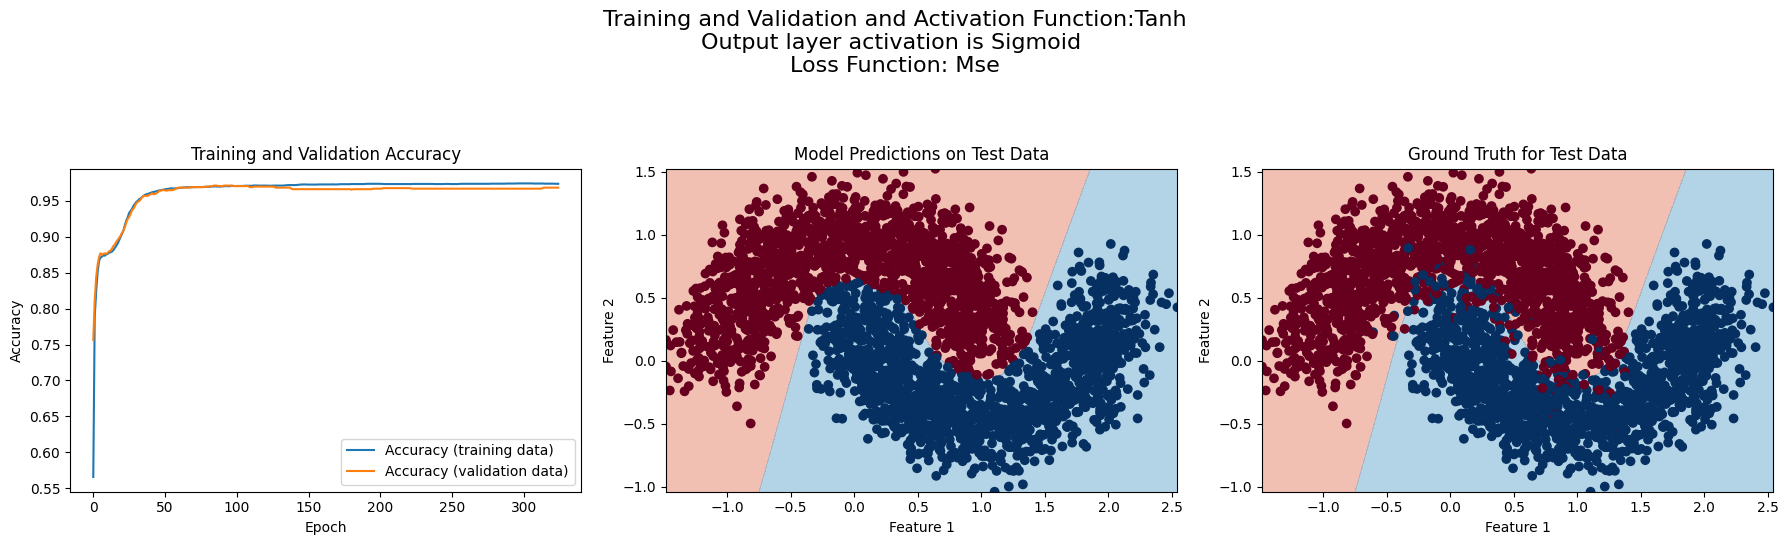

Test Loss: 0.0231
Test Accuracy: 0.9703
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [12]:
activation_function = 'tanh'
loss_function = 'mse'
model = build_model(activation_function=activation_function, loss_function=loss_function)
train_and_evaluate_model(model, epochs=325)

# Conclusion
Summarize your findings and discuss why certain combinations might work better than others for this specific problem.